
[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>MA, AR, and Arma </h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>


# MA, AR, and Arma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
import seaborn as sns
!pip -q install yfinance
import yfinance as yf

In [2]:
####Moving Average analysis

In [3]:
FB = yf.Ticker("META")
# get historical market data
FB_values = FB.history(start="2020-06-01")

<AxesSubplot:xlabel='Date'>

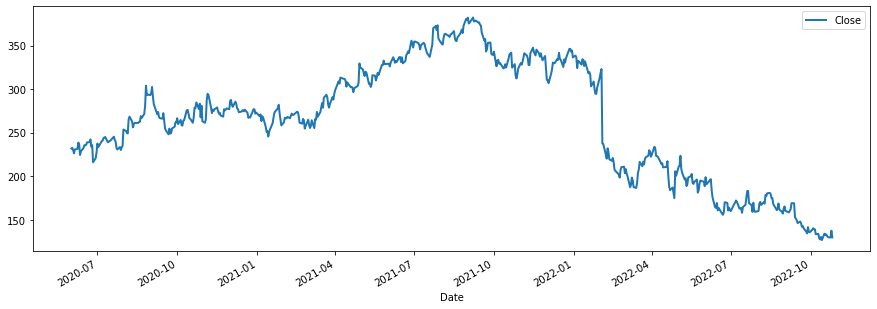

In [4]:
FB_values[['Close']].plot(lw=2)

<AxesSubplot:xlabel='Date'>

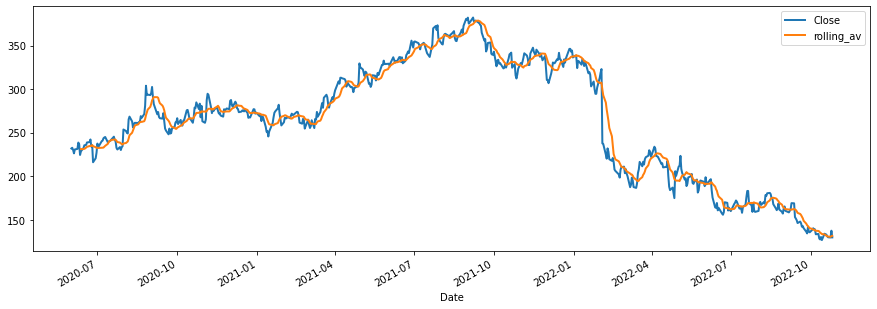

In [5]:
#Rolling average
FB_values['rolling_av'] = FB_values['Close'].rolling(10).mean()
# take a look
FB_values[['Close','rolling_av']].plot(lw=2)

In [6]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=FB_values['Close'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. U

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  608
Model:                ARIMA(0, 0, 10)   Log Likelihood               -2709.211
Date:                Wed, 26 Oct 2022   AIC                           5442.423
Time:                        19:26:34   BIC                           5495.345
Sample:                             0   HQIC                          5463.012
                                - 608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6635      7.284     36.199      0.000     249.388     277.939
ma.L1          0.7786      0.019     40.264      0.000       0.741       0.817
ma.L2          0.3297      0.013     24.505      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
start_date = '2020-06-12'
end_date   = '2022-10-04'
FB_values['forecast_Ma'] = results.predict(start=start_date, end=end_date)

<AxesSubplot:xlabel='Date'>

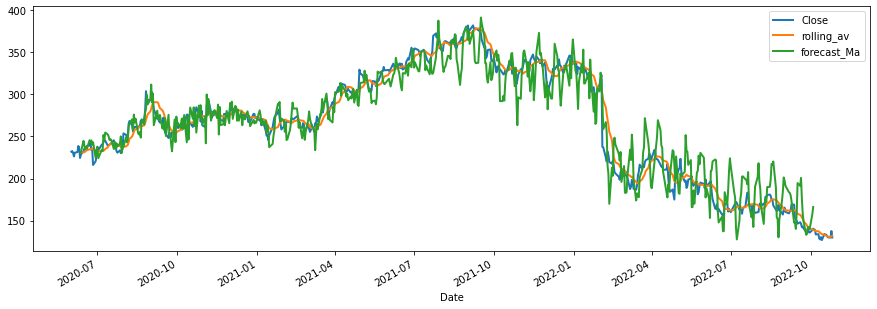

In [8]:
FB_values[['Close','rolling_av','forecast_Ma']].plot(lw=2)


In [9]:
# A Mojaor flaw is that the time series may not be stationary. It has to be done on returns

In [10]:
####Auto Regressive analysis
ARMA_model = ARIMA(endog=FB_values['Close'], order=(10, 0,0))
results = ARMA_model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  608
Model:                ARIMA(10, 0, 0)   Log Likelihood               -2051.121
Date:                Wed, 26 Oct 2022   AIC                           4126.243
Time:                        19:26:35   BIC                           4179.165
Sample:                             0   HQIC                          4146.832
                                - 608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6740    509.998      0.517      0.605    -735.904    1263.252
ar.L1          0.9530      0.050     18.994      0.000       0.855       1.051
ar.L2          0.0623      0.062      1.004      0.3

In [11]:
start_date = '2020-06-12'
end_date   = '2022-10-04'
FB_values['forecast_Ar'] = results.predict(start=start_date, end=end_date)

<AxesSubplot:xlabel='Date'>

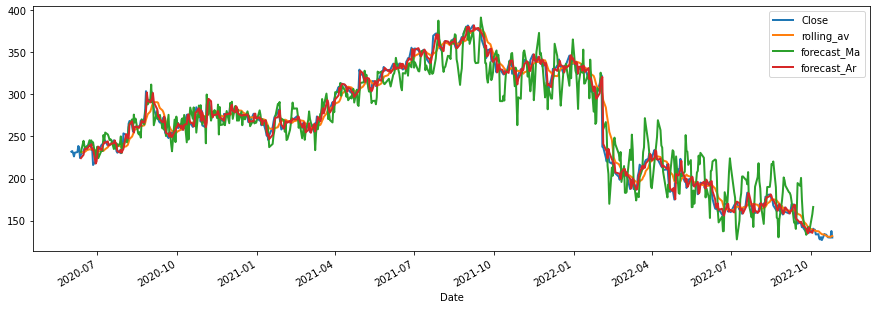

In [12]:
FB_values[['Close','rolling_av','forecast_Ma','forecast_Ar']].plot(lw=2)


In [13]:
####Now lets do AR & MA
ARMA_model = ARIMA(endog=FB_values['Close'], order=(10, 0,10))
results = ARMA_model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramet

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  608
Model:               ARIMA(10, 0, 10)   Log Likelihood               -2048.853
Date:                Wed, 26 Oct 2022   AIC                           4141.706
Time:                        19:26:37   BIC                           4238.730
Sample:                             0   HQIC                          4179.453
                                - 608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6608     77.496      3.402      0.001     111.771     415.551
ar.L1          0.3242     10.387      0.031      0.975     -20.035      20.683
ar.L2          0.6924      8.735      0.079      0.9

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
start_date = '2020-06-12'
end_date   = '2022-10-04'
FB_values['forecast_ArMA'] = results.predict(start=start_date, end=end_date)

<AxesSubplot:xlabel='Date'>

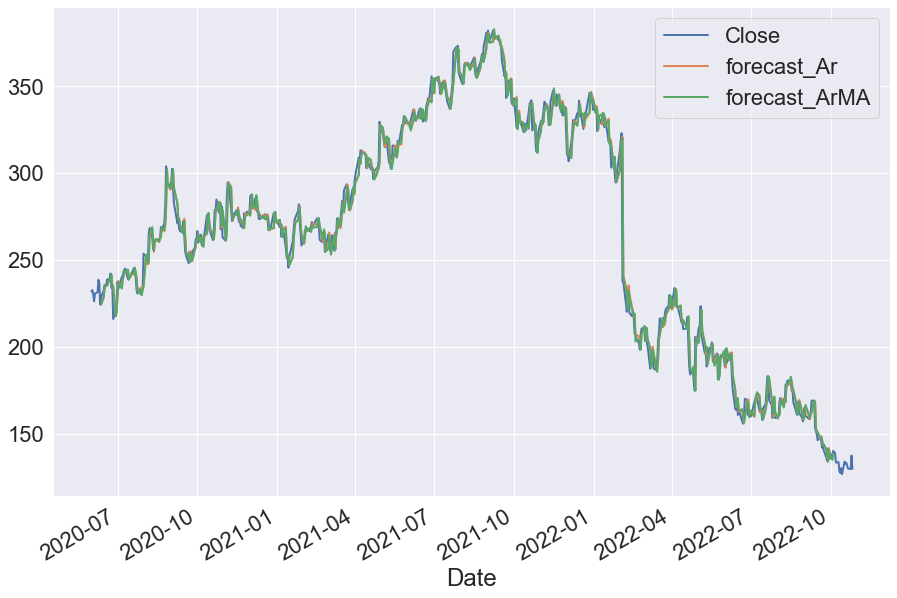

In [15]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set(font_scale=2)
FB_values[['Close','forecast_Ar','forecast_ArMA']].plot(lw=2)
